In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense,Dropout,BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
import plotly.express as px


import glob, os, random


In [2]:
base_path = './archive/Garbage classification/Garbage classification'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2527


In [3]:
labels_garbage = os.listdir(base_path)

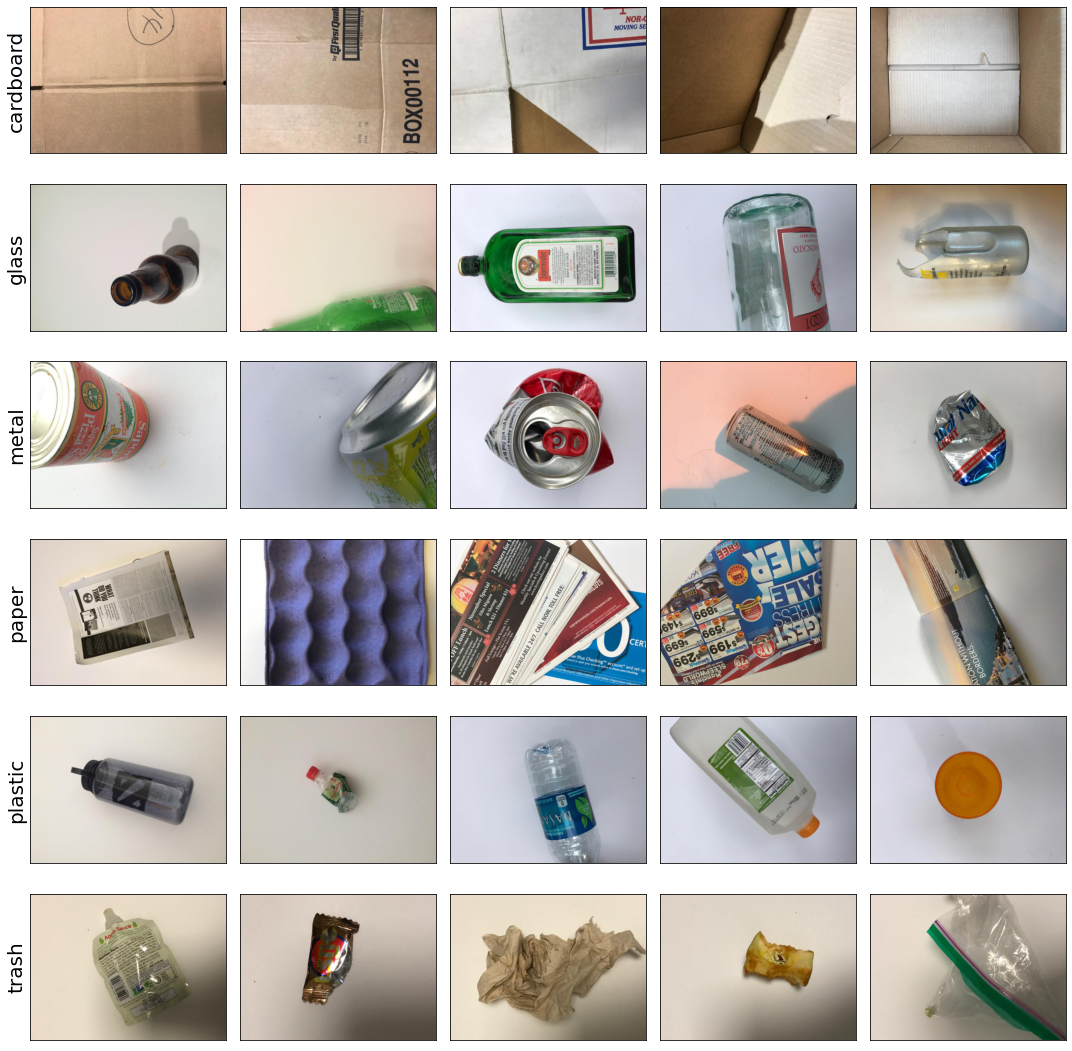

In [4]:
plt.figure(figsize=(15,15))

for i in range(6):
    directory = os.path.join(base_path, labels_garbage[i])
    for j in range(5):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 5, i*5 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels_garbage[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()



In [5]:

#generate train data
train_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1).flow_from_directory(
                          base_path,
                          target_size=(300, 300),
                          batch_size=16,
                          class_mode='categorical',
                          subset='training',
                          seed=0
                          )



#generae test data
validation_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1).flow_from_directory(
                          base_path,
                          target_size=(300, 300),
                          batch_size=16,
                          class_mode='categorical',
                          subset='validation',
                          seed=0
                          )

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3))),
model.add(MaxPooling2D(pool_size=2)),
model.add(BatchNormalization()),

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')),
model.add(MaxPooling2D(pool_size=2)),
model.add(BatchNormalization()),
    
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')),
model.add(MaxPooling2D(pool_size=2)),
model.add(BatchNormalization()),
    
model.add(Flatten()),
model.add(Dense(64, activation='relu')),
model.add(Flatten()),
model.add(Dense(6, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        1

In [7]:
model_details=model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
143/143 [==============================] - 147s 1s/step - loss: 1.3554 - acc: 0.5066 - val_loss: 2.1446 - val_acc: 0.2311
Epoch 2/10
143/143 [==============================] - 142s 994ms/step - loss: 1.0574 - acc: 0.5997 - val_loss: 2.4408 - val_acc: 0.2629
Epoch 3/10
143/143 [==============================] - 144s 1s/step - loss: 0.9642 - acc: 0.6639 - val_loss: 2.1673 - val_acc: 0.2311
Epoch 4/10
143/143 [==============================] - 148s 1s/step - loss: 0.9431 - acc: 0.6569 - val_loss: 1.3971 - val_acc: 0.5100
Epoch 5/10
143/143 [==============================] - 146s 1s/step - loss: 0.8544 - acc: 0.6916 - val_loss: 1.0097 - val_acc: 0.6335
Epoch 6/10
143/143 [==============================] - 142s 992ms/step - loss: 0.8532 - acc: 0.6876 - val_loss: 1.2154 - val_acc: 0.5857
Epoch 7/10
143/143 [==============================] - 142s 993ms/step - loss: 0.7983 - acc: 0.7021 - val_loss: 0.9429 - 

In [8]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']
accuracy = model_details.history['acc']
validation_accuracy = model_details.history['val_acc']

In [9]:
#train again to increase accuracy
#model_details=model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)
#loss.extend(model_details.history['loss'])
#validation_loss.extend(model_details.history['val_loss'])
#accuracy.extend(model_details.history['acc'])
#validation_accuracy.extend(model_details.history['val_acc'])

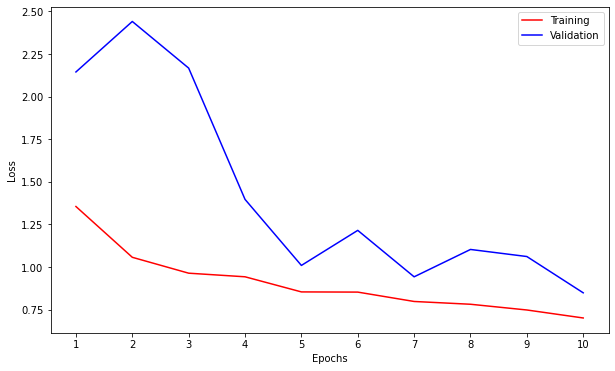

In [10]:
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

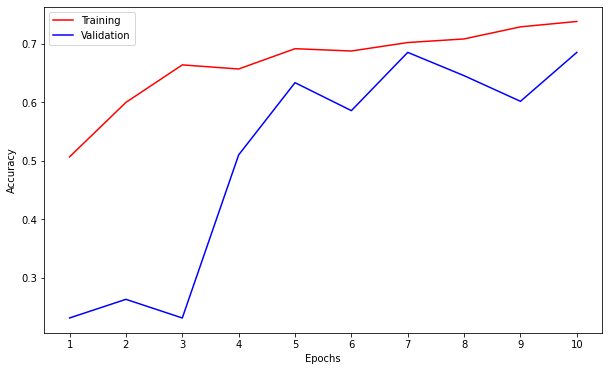

In [11]:
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

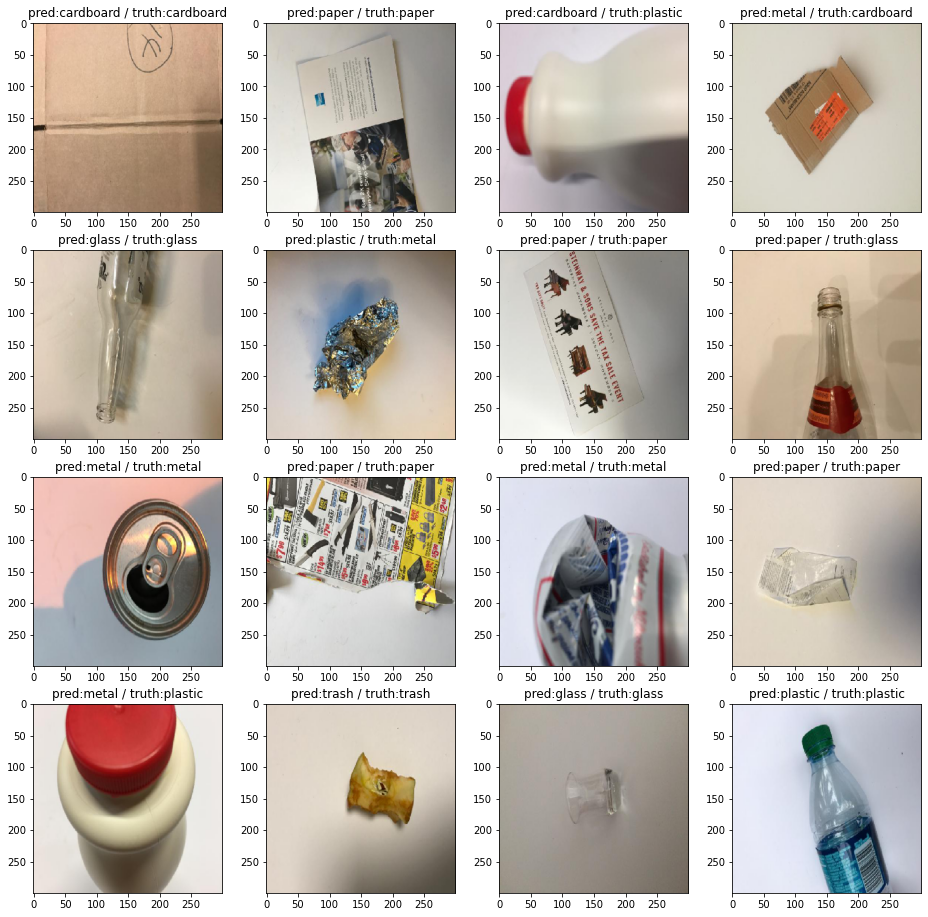

In [12]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [13]:
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict(validation_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

[3 0 3 2 1 4 3 3 1 0 4 3 4 3 0 3 0 3 0 2 1 4 3 3 2 3 2 3 2 5 1 4 4 2 5 1 4
 1 1 4 4 2 3 0 2 1 1 2 2 1 3 4 1 2 1 2 2 3 0 1 4 4 5 3 2 1 2 2 2 2 1 0 2 4
 1 3 1 0 3 3 3 1 3 3 2 4 1 4 3 3 5 3 1 3 5 3 2 2 2 3 3 2 1 2 1 1 3 3 3 4 2
 1 3 2 2 4 2 3 3 4 4 0 1 3 2 3 2 1 5 0 1 2 3 3 4 0 0 4 4 0 1 3 4 4 3 0 1 3
 1 1 0 5 2 5 1 1 4 2 2 4 2 4 4 4 0 3 1 3 0 4 5 3 1 4 3 2 0 2 0 3 4 2 2 3 1
 1 0 5 2 3 1 3 1 1 4 1 3 3 4 4 3 1 2 3 2 2 1 1 4 4 5 1 2 2 2 4 2 3 0 1 2 2
 4 0 2 4 1 4 0 3 1 0 1 3 0 3 2 0 4 4 5 1 0 0 2 1 3 3 4 0 1]


In [14]:
from sklearn import metrics
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

def plot_cm(cm, title=""):
    fig = px.imshow(cm,x=class_labels,y=class_labels,title=title)
    fig.show()

              precision    recall  f1-score   support

   cardboard       0.17      0.12      0.14        40
       glass       0.23      0.24      0.24        50
       metal       0.21      0.27      0.23        41
       paper       0.20      0.20      0.20        59
     plastic       0.20      0.19      0.20        48
       trash       0.08      0.08      0.08        13

    accuracy                           0.20       251
   macro avg       0.18      0.18      0.18       251
weighted avg       0.20      0.20      0.20       251



In [15]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)
plot_cm(conf_mat, "Confusion Matrix ")